# Ensemble Analysis

This example compares experimental structural data analyzed using Principal Component Analysis (PCA) with the theoretical data predicted by Anisotropic Network Model (ANM):

## Retrieve dataset

In [1]:
from prody import *
from pylab import *
%matplotlib inline

In [2]:
p38_sequence = '''GLVPRGSHMSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKTGHRV
AVKKLSRPFQSIIHAKRTYRELRLLKHMKHENVIGLLDVFTPARSLEEFNDVYLVTHLMGADLNNIVKCQKLTDDH
VQFLIYQILRGLKYIHSADIIHRDLKPSNLAVNEDCELKILDFGLARHTDDEMTGYVATRWYRAPEIMLNWMHYNQ
TVDIWSVGCIMAELLTGRTLFPGTDHIDQLKLILRLVGTPGAELLKKISSESARNYIQSLAQMPKMNFANVFIGAN
PLAVDLLEKMLVLDSDKRITAAQALAHAYFAQYHDPDDEPVADPYDQSFESRDLLIDEWKSLTYDEVISFVPPPLD
QEEMES'''

In [3]:
blast_record = blastPDB(p38_sequence)

@> Blast searching NCBI PDB database for "GLVPR..."
@> Blast search completed in 12.8s.


In [4]:
pdbids = blast_record.getHits()

In [5]:
pathPDBFolder('/data/prody_tutorials/workshop_2016/pdb_files')

@> Local PDB folder is set: '/data/prody_tutorials/workshop_2016/pdb_files'
@> A plain folder structure will be assumed.


In [6]:
pdbfiles = fetchPDB(*pdbids, compressed=False)

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 1yqj downloaded (1yqj.pdb)
@> 4e5a downloaded (4e5a.pdb)
@> 2i0h downloaded (2i0h.pdb)
@> 3gi3 downloaded (3gi3.pdb)
@> 4kip downloaded (4kip.pdb)
@> 4kiq downloaded (4kiq.pdb)
@> 1m7q downloaded (1m7q.pdb)
@> 3zya downloaded (3zya.pdb)
@> 1di9 downloaded (1di9.pdb)
@> 3ody downloaded (3ody.pdb)
@> 3pg3 downloaded (3pg3.pdb)
@> 3fkn downloaded (3fkn.pdb)
@> 3fko downloaded (3fko.pdb)
@> 3fkl downloaded (3fkl.pdb)
@> 3hec downloaded (3hec.pdb)
@> 1a9u downloaded (1a9u.pdb)
@> 3ds6 downloaded (3ds6.pdb)
@> 4eh8 downloaded (4eh8.pdb)
@> 2fsm downloaded (2fsm.pdb)
@> 3heg downloaded (3heg.pdb)
@> 2fso downloaded (2fso.pdb)
@> 3fsk downloaded (3fsk.pdb)
@> 3kq7 downloaded (3kq7.pdb)
@> 3oc1 downloaded (3oc1.pdb)
@> 3fsf downloaded (3fsf.pdb)
@> 3s3i downloaded (3s3i.pdb)
@> 3bv3 downloaded (3bv3.pdb)
@> 3hl7 downloaded (3hl7.pdb)
@> 3e93 downloaded (3e93.pdb)
@> 3e92 downloaded (3e92.pdb)
@> 3itz downloaded (3itz.pdb)
@> 3bv2 downloaded (3bv

## Set reference chain

In [7]:
ref_structure = parsePDB('1p38')
ref_selection = ref_structure.select('resnum 5 to 31 36 to 114 122 to '
                                     '169 185 to 351 and calpha')

@> PDB file is found in working directory (1p38.pdb).
@> 2962 atoms and 1 coordinate set(s) were parsed in 0.01s.


In [8]:
ref_chain = ref_selection.getHierView().getChain('A')
repr(ref_chain)

'<Chain: A from 1p38 (321 residues, 321 atoms)>'

## Ensemble Preparation

In [9]:
ensemble = PDBEnsemble('p38 X-ray')

In [10]:
ensemble.setAtoms(ref_chain)
ensemble.setCoords(ref_chain)

In [11]:
for pdbfile in pdbfiles:
    structure = parsePDB(pdbfile, subset='calpha')
    mappings = mapOntoChain(structure, ref_chain)
    atommap = mappings[0][0]
    ensemble.addCoordset(atommap, weights=atommap.getFlags('mapped'), degeneracy=True)

@> 356 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> Evaluating AtomGroup 1yqj_ca: 1 chains are identified
@> Trying to map atoms based on residue numbers and identities:
@>   Comparing Chain A from 1yqj_ca (len=356) with Chain A from 1p38:
@> 	Mapped: 321 residues match with 99% sequence identity and 90% overlap.
@> 332 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> Evaluating AtomGroup 4e5a_ca: 1 chains are identified
@> Trying to map atoms based on residue numbers and identities:
@>   Comparing Chain X from 4e5a_ca (len=332) with Chain A from 1p38:
@> 	Mapped: 320 residues match with 99% sequence identity and 96% overlap.
@> 349 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> Evaluating AtomGroup 2i0h_ca: 1 chains are identified
@> Trying to map atoms based on residue numbers and identities:
@>   Comparing Chain A from 2i0h_ca (len=349) with Chain A from 1p38:
@> 	Mapped: 321 residues match with 99% sequence identity and 91% overlap.
@> 330 atoms and 1 coordi

In [12]:
repr(ensemble)

'<PDBEnsemble: p38 X-ray (230 conformations; 321 atoms)>'

In [13]:
len(ensemble) == len(pdbfiles)

True

In [14]:
ensemble.iterpose()

@> Starting iterative superposition:
@> Step #1: RMSD difference = 8.4184e-01
@> Step #2: RMSD difference = 2.4028e-04
@> Step #3: RMSD difference = 1.5959e-07
@> Iterative superposition completed in 0.07s.
@> Final superposition to calculate transformations.
@> Superposition completed in 0.02 seconds.


## PCA calculation

In [15]:
pca = PCA('p38 xray')           # Instantiate a PCA instance

pca.buildCovariance(ensemble)   # Build covariance for the ensemble

pca.calcModes()                 # Calculate modes (20 of the by default)

@> Covariance is calculated using 230 coordinate sets.
@> Covariance matrix calculated in 0.344429s.
@> 20 modes were calculated in 0.24s.


## ANM calculation

In [16]:
anm = ANM('1p38')             # Instantiate a ANM instance

anm.buildHessian(ref_chain)   # Build Hessian for the reference chain

anm.calcModes()               # Calculate slowest non-trivial 20 modes

@> Hessian was built in 0.07s.
@> 20 modes were calculated in 0.23s.


## Save your work

In [17]:
saveModel(pca)
saveModel(anm)
saveEnsemble(ensemble)
writePDB('p38_ref_chain.pdb', ref_chain)

'p38_ref_chain.pdb'

## Fractional Variance

In [18]:
for mode in pca[:3]:    # Print % variance explained by top PCs
    var = calcFractVariance(mode)*100
    print('{0:s}  % variance = {1:.2f}'.format(mode, var))

Mode 1 from PCA p38 xray  % variance = 23.88
Mode 2 from PCA p38 xray  % variance = 17.62
Mode 3 from PCA p38 xray  % variance = 14.28


## Collectivity of modes

In [19]:
for mode in pca[:3]:    # Print PCA mode collectivity
    coll = calcCollectivity(mode)
    print('{0:s}  collectivity = {1:.2f}'.format(mode, coll))

Mode 1 from PCA p38 xray  collectivity = 0.50
Mode 2 from PCA p38 xray  collectivity = 0.16
Mode 3 from PCA p38 xray  collectivity = 0.64


In [20]:
for mode in anm[:3]:    # Print ANM mode collectivity
    coll = calcCollectivity(mode)
    print('{0:s}  collectivity = {1:.2f}'.format(mode, coll))

Mode 1 from ANM 1p38  collectivity = 0.65
Mode 2 from ANM 1p38  collectivity = 0.55
Mode 3 from ANM 1p38  collectivity = 0.68


## PCA - ANM overlap

In [21]:
printOverlapTable(pca[:3], anm[:3]) # Top 3 PCs vs slowest 3 ANM modes

Overlap Table
                        ANM 1p38
                    #1     #2     #3
PCA p38 xray #1   -0.77   0.00  -0.48
PCA p38 xray #2   -0.34  +0.09  +0.39
PCA p38 xray #3   -0.30  -0.70  +0.35



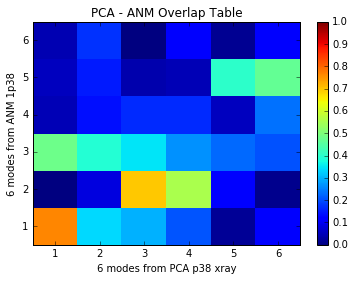

In [22]:
showOverlapTable(pca[:6], anm[:6]);
title('PCA - ANM Overlap Table');

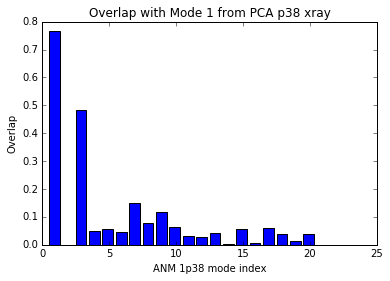

In [23]:
showOverlap(pca[0], anm);

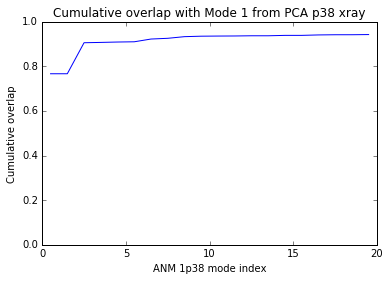

In [24]:
showCumulOverlap(pca[0], anm);

## Square Fluctuations

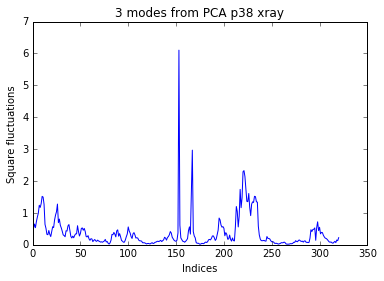

In [25]:
showSqFlucts(pca[:3]);

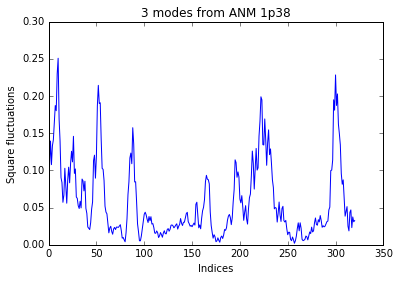

In [26]:
showSqFlucts(anm[:3]);

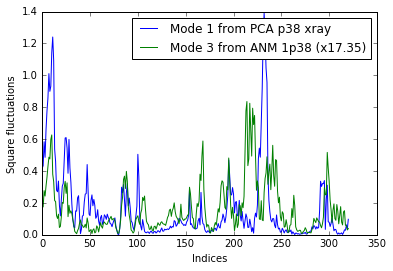

In [27]:
showScaledSqFlucts(pca[0], anm[2]);
legend();

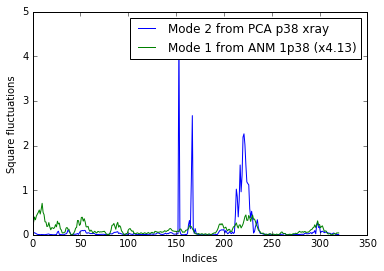

In [28]:
showScaledSqFlucts(pca[1], anm[0]);
legend();

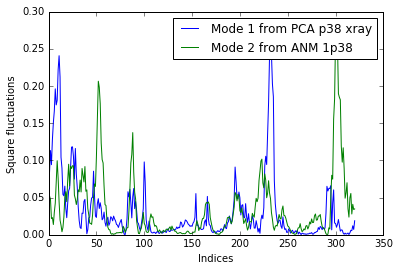

In [29]:
showNormedSqFlucts(pca[0], anm[1]);
legend();

## Projections

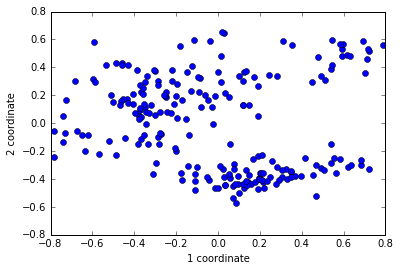

In [30]:
showProjection(ensemble, pca[:2]);
axis([-0.8, 0.8, -0.8, 0.8]);